## Building the Ship

In [1]:
import random

d = 40

#Helper method to check neighbors in board initialization
def checkNeighbors(grid, r, c, a):
    return [grid[r-1][c],grid[r+1][c],grid[r][c-1],grid[r][c+1]].count(a)

#Create new board with given edge length
def createBoard(d):
    grid = [[0 for _ in range(d+2)] for _ in range(d+2)]

    for j in range(d+2):
        grid[0][j] = 2 
        grid[d+1][j] = 2 
    for i in range(d+2):
        grid[i][0] = 2 
        grid[i][d+1] = 2
    x = random.randint(1, d)
    y = random.randint(1, d)

    fringe = []
    fringe.append((x,y))

    deadEnds = []

    while len(fringe) > 0:
        curr = random.choice(fringe)
        fringe.remove(curr)
        r, c = curr[0], curr[1]
        if checkNeighbors(grid, r, c, 1) > 1:
            continue
        grid[r][c] = 1
        up = (r-1, c) 
        down = (r+1, c) 
        left = (r, c-1) 
        right = (r, c+1)
        deadEnd = True
        for elt in [up, down, left, right]:
            if grid[elt[0]][elt[1]] == 0:
                numOpenNeighbors = checkNeighbors(grid, elt[0], elt[1], 1)
                if numOpenNeighbors == 1:
                    deadEnd = False
                    fringe.append(elt)
        if deadEnd:
            deadEnds.append(curr)
    
    for elt in deadEnds:
        if grid[elt[0]][elt[1]] == 2:
            deadEnds.remove(elt)
            continue
        numOpenNeighbors = checkNeighbors(grid, elt[0], elt[1], 1)
        if numOpenNeighbors > 1:
            deadEnds.remove(elt)

    newList = random.sample(deadEnds, len(deadEnds) // 2)
    for elt in newList:
        r = elt[0]
        c = elt[1]
        up = (r-1, c) 
        down = (r+1, c) 
        left = (r, c-1) 
        right = (r, c+1)
        neighbors = [up,down,left,right]
        neighbors = [elt for elt in neighbors if grid[elt[0]][elt[1]] == 0]
#         for pt in neighbors:
#             if (pt[0] < 1 or pt[0] > 40) or (pt[1] < 1 or pt[1] > 40):
#                 neighbors.remove(pt)
#             if grid[pt[0]][pt[1]] == 1:
#                 neighbors.remove(pt)
#     #     print(neighbors)
        if neighbors == []:
            continue
        curr = random.choice(neighbors)
#         while grid[curr[0]][curr[1]] == 2:
#             print(curr)
#             curr = random.choice(neighbors)
        grid[curr[0]][curr[1]] = 1
        
#     count = 0   
#     for row in grid:
#         count += row.count(1)
#     print(f"Percent of cells opened: {100*count/(d*d)}")
    return grid

board implementation details here if youd like

In [2]:
grid = createBoard(d)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

color_map_3 = {
    0: 'white',
    1: 'black',
    2: 'red'
}

color_map_7 = {
    0: 'white',
    1: 'black',
    2: 'red',
    3: 'orange',
    4: 'blue',
    5: 'purple',
    6: 'yellow'
}

def visualizeGrid(color_map, grid):
    fig, ax = plt.subplots()

    for i in range(len(grid)):
        for j in range(len(grid[i])):
            ax.add_patch(plt.Rectangle((j, i), 1, 1, facecolor=color_map[grid[i][j]]))

    ax.set_xlim(0, len(grid[0]))
    ax.set_ylim(0, len(grid))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    plt.gca().invert_yaxis() 
    plt.show()

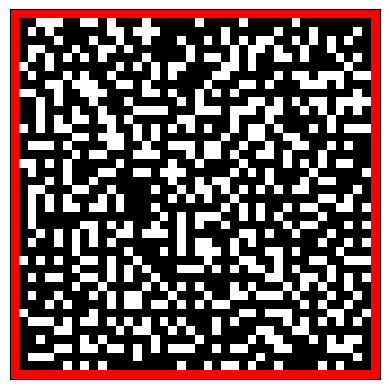

In [4]:
visualizeGrid(color_map_3, grid)

black = open cells, red = wall

## Coding the Fire


In [5]:
def setFire(grid, pt, q):
    if grid[pt[0]][pt[1]] == 3:
        return
    k = checkNeighbors(grid, pt[0], pt[1], 3)
    prob = 1 - (1-q)**k
    x = random.random()
    if x <= prob:
        grid[pt[0]][pt[1]] = 3
    return

In [6]:
def spreadFire(grid, fireLocs, q, df=None, i=None, timestep=None):
    fireLocsNew = []
    for curr in fireLocs:
        if grid[curr[0]][curr[1]] == 2:
            fireLocs.remove(curr)
            continue
        setFire(grid, curr, q)
        if grid[curr[0]][curr[1]] == 3:
            fireLocs.remove(curr)
            if df is not None and i is not None and timestep is not None:
                df.loc[curr][i] = timestep
            neighbors = [(curr[0]-1,curr[1]), (curr[0]+1,curr[1]), (curr[0], curr[1]-1), (curr[0], curr[1]+1)]
            for elt in neighbors:
                if grid[elt[0]][elt[1]] == 1 or grid[elt[0]][elt[1]] == 4:
                    fireLocsNew.append(elt)
    fireLocs.extend(fireLocsNew)
    return fireLocs

In [7]:
def reset_grid(grid):
    for i in range(len(grid)):  # Iterate through rows
            for j in range(len(grid[i])):  # Iterate through columns
                if (grid[i][j] in range(3,7)):
                    grid[i][j] = 1
#     grid[fireLoc[0]][fireLoc[1]] = 3

## Location Initializations

In [50]:
def location_initialization(grid, botLoc=None, butLoc=None, fireLoc=None):
    botLoc = (random.randint(1, d), random.randint(1, d))
    while grid[botLoc[0]][botLoc[1]] == 0:
        botLoc = (random.randint(1, d), random.randint(1, d))

    butLoc = (random.randint(1, d), random.randint(1, d))
    while grid[butLoc[0]][butLoc[1]] == 0:
        butLoc = (random.randint(1, d), random.randint(1, d))

    fireLoc = (random.randint(1, d), random.randint(1, d))
    while grid[fireLoc[0]][fireLoc[1]] == 0:
        fireLoc = (random.randint(1, d), random.randint(1, d))

    notDistinct = (botLoc == butLoc) or (botLoc == fireLoc) or (butLoc == fireLoc)
    #print(distinct)
    i = 1
    while notDistinct:
#         print(i)
        botLoc = (random.randint(1, d), random.randint(1, d))
        while grid[botLoc[0]][botLoc[1]] == 0:
            botLoc = (random.randint(1, d), random.randint(1, d))
        butLoc = (random.randint(1, d), random.randint(1, d))
        while grid[butLoc[0]][butLoc[1]] == 0:
            butLoc = (random.randint(1, d), random.randint(1, d))
        fireLoc = (random.randint(1, d), random.randint(1, d))
        while grid[fireLoc[0]][fireLoc[1]] == 0:
            fireLoc = (random.randint(1, d), random.randint(1, d))
        i = i + 1
        notDistinct = (botLoc == butLoc) or (botLoc == fireLoc) or (butLoc == fireLoc)
    
    return botLoc,butLoc,fireLoc

note - for every new board we create we need to run createboard AND location_initialization

In [9]:
botLoc,butLoc,fireLoc = location_initialization(grid)
print(f"Bot Location: {botLoc}")
print(f"Button Location: {butLoc}")
print(f"Fire Location: {fireLoc}")

Bot Location: (29, 26)
Button Location: (18, 38)
Fire Location: (11, 40)


## Shortest Path (Bot 1)

In [10]:
import copy

bot1Grid = copy.deepcopy(grid)
bot1Grid[fireLoc[0]][fireLoc[1]] = 3

def shortestBot1(grid, botLoc, fireLocs, butLoc):
    fringe1 = []
    fringe1.append(botLoc)

    closed_set = {}
    prev1 = {}
    prev1[botLoc] = None

    while len(fringe1) > 0:
        curr1 = fringe1.pop(0)
        if curr1 == butLoc:
            #print(curr1)
#             print("Success")
            break

        if curr1 not in closed_set:
            closed_set.update({curr1: 1})
            r1, c1 = curr1[0], curr1[1]
            neighbors1 = [(r1-1, c1),(r1+1, c1),(r1, c1-1),(r1, c1+1)]
            for elt in neighbors1:
                if bot1Grid[elt[0]][elt[1]] == 1 and elt not in closed_set:
                    fringe1.append(elt)
                    prev1[elt] = curr1
    #print(prev1)

    path = []
    curr = butLoc
    while curr is not None:
        path.append(curr)
        curr = prev1[curr]

    # Return the path from start to finish
#     path = path[::-1]  # Reverse the path to go from start to finish
    return path[::-1]


## Game Loop (Bot 1)

In [11]:
def gameLoop1(grid, botLoc, fireLoc, butLoc, trackTime, q):
    t = 1
    fireLocs = []
    r,c = fireLoc[0], fireLoc[1]
    grid[r][c] = 3
    fireLocs.extend(((r-1, c), (r+1, c), (r,c-1), (r,c+1)))
    success = True
    path = shortestBot1(bot1Grid, botLoc, fireLocs, butLoc)
    for i in path[1:]:
        fireLocs = spreadFire(bot1Grid, fireLocs, q)
        if bot1Grid[i[0]][i[1]] == 3:
            if trackTime: print(f"Bot1 failed in {t} timesteps.")
            success = False
            break
        t = t + 1
        bot1Grid[i[0]][i[1]] = 4
    l = len(path)
    bot1Grid[butLoc[0]][butLoc[1]] = 5
    bot1Grid[fireLoc[0]][fireLoc[1]] = 6
    return success
success_1 = gameLoop1(bot1Grid, botLoc, fireLoc, butLoc, True, 0.5)
if success_1: print("Success!")

Bot1 failed in 26 timesteps.


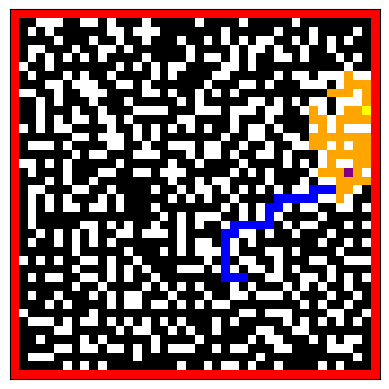

In [12]:
visualizeGrid(color_map_7, bot1Grid)

The yellow dot represents the source of the fire. The pink dot represents the button.

In [13]:
reset_grid(bot1Grid)

## Shortest Path (Bot 2)

In [14]:
def shortestBot2(grid, botLoc, fireLocs, butLoc, i, path):
    currentFires = set([])
    currentFires.add(fireLoc)
    for row in range(len(grid)):
        for col in range(len(grid[row])):
            if grid[row][col] == 3:
                currentFires.add((row, col))
    fringe1 = []
    fringe1.append(botLoc)

    closed_set = {}
    prev1 = {}
    prev1[botLoc] = None
    success = False

    while len(fringe1) > 0:
        curr1 = fringe1.pop(0)
        if curr1 == butLoc:
            #print(curr1)
            success = True
            break

        if curr1 not in closed_set:
            closed_set.update({curr1: 1})
            r1, c1 = curr1[0], curr1[1]
            neighbors1 = [(r1-1, c1),(r1+1, c1),(r1, c1-1),(r1, c1+1)]
            for elt in neighbors1:
                if (grid[elt[0]][elt[1]] == 1 or grid[elt[0]][elt[1]] == 4) and elt not in closed_set and elt not in currentFires:
                    fringe1.append(elt)
                    prev1[elt] = curr1
    #print(prev1)
    if not success: 
        return path

    path2 = []
    curr = butLoc
#     print(prev1)
    while curr is not None:
        path2.append(curr)
        curr = prev1[curr]
    path2 = path2[::-1]
    if path2 != path[i:]:
        path[i:] = path2

    # Return the path from start to finish
    return path  # Reverse the path to go from start to finish

## Game Loop (Bot 2)

In [15]:
bot2Grid = copy.deepcopy(grid)
bot2Grid[fireLoc[0]][fireLoc[1]] = 3

def gameLoop2(grid, botLoc, fireLoc, butLoc, trackTime, q):
    t = 1
    fireLocs = []
    r,c = fireLoc[0], fireLoc[1]
    grid[r][c] = 3
    fireLocs.extend(((r-1, c), (r+1, c), (r,c-1), (r,c+1)))
    success = True
    pathBot2 = []
    pathBot2.append(botLoc)
    pathBot2 = shortestBot2(bot2Grid, botLoc, fireLocs, butLoc, 0, pathBot2)
    i = 1
    while i < len(pathBot2):
        fireLocs = spreadFire(bot2Grid, fireLocs, q)
        if bot2Grid[pathBot2[i][0]][pathBot2[i][1]] == 3:
            if trackTime: 
                print(f"Bot2 failed in {t} timesteps.")
            success= False
            break
        bot2Grid[pathBot2[i][0]][pathBot2[i][1]] = 4
        pathBot2 = shortestBot2(bot2Grid, pathBot2[i], fireLocs, butLoc, i, pathBot2)
        t = t + 1
        i = i + 1
#     l = len(path)
    bot2Grid[butLoc[0]][butLoc[1]] = 5
    bot2Grid[fireLoc[0]][fireLoc[1]] = 6
    return success
success_2 = gameLoop2(bot2Grid, botLoc, fireLoc, butLoc, True, 0.5)
if success_2: print(f"Success!")

Bot2 failed in 30 timesteps.


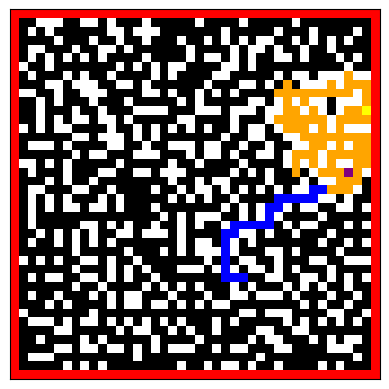

In [16]:
visualizeGrid(color_map_7, bot2Grid)

In [17]:
reset_grid(bot2Grid)

## Shortest Path (Bot 3)

In [18]:
def shortestBot3(grid, botLoc, fireLocs, butLoc, i, path):
    fringe1 = []
    fringe1.append(botLoc)

    closed_set = {}
    prev1 = {}
    prev1[botLoc] = None
    success = False

    while len(fringe1) > 0:
        curr1 = fringe1.pop(0)
        if curr1 == butLoc:
            #print(curr1)
            success = True
            break

        if curr1 not in closed_set:
            closed_set.update({curr1: 1})
            r1, c1 = curr1[0], curr1[1]
            neighbors1 = [(r1-1, c1),(r1+1, c1),(r1, c1-1),(r1, c1+1)]
            for elt in neighbors1:
                if (grid[elt[0]][elt[1]] == 1 or grid[elt[0]][elt[1]] == 4) and elt not in closed_set and (elt not in fireLocs or elt == butLoc):
                    fringe1.append(elt)
                    prev1[elt] = curr1
    #print(prev1)
    if not success: 
        return path

    path2 = []
    curr = butLoc
#     print(prev1)
    while curr is not None:
        path2.append(curr)
        curr = prev1[curr]
    path2 = path2[::-1]
    if path2 != path[i:]:
        path[i:] = path2

    # Return the path from start to finish
    return path  # Reverse the path to go from start to finish

## Game Loop (Bot 3)

In [19]:
bot3Grid = copy.deepcopy(grid)
bot3Grid[fireLoc[0]][fireLoc[1]] = 3

def gameLoop3(grid, botLoc, fireLoc, butLoc, trackTime, q):
    t = 1
    fireLocs = []
    r,c = fireLoc[0], fireLoc[1]
    grid[r][c] = 3
    fireLocs.extend(((r-1, c), (r+1, c), (r,c-1), (r,c+1)))
    success = True
    pathBot3 = []
    pathBot3.append(botLoc)
    pathBot3 = shortestBot3(bot3Grid, botLoc, fireLocs, butLoc, 0, pathBot3)
    i = 1
    while i < len(pathBot3):
        fireLocs = spreadFire(bot3Grid, fireLocs, q)
        if bot3Grid[pathBot3[i][0]][pathBot3[i][1]] == 3:
            if trackTime:
                print(f"Bot3 failed in {t} timesteps.")
            success= False
            break
        bot3Grid[pathBot3[i][0]][pathBot3[i][1]] = 4
        pathBot3 = shortestBot3(bot3Grid, pathBot3[i], fireLocs, butLoc, i, pathBot3)
        t = t + 1
        i = i + 1
#     l = len(path)
    bot3Grid[butLoc[0]][butLoc[1]] = 5
    bot3Grid[fireLoc[0]][fireLoc[1]] = 6
    return success

count = 0
for i in range(10):
    botLoc,butLoc,fireLoc = location_initialization(grid)
    reset_grid(bot3Grid)
    success = gameLoop3(bot3Grid, botLoc, fireLoc, butLoc, False, 1)
    print(success)
    if success:
        count += 1
print(count/10)

True
True
False
True
True
False
True
False
True
True
0.7


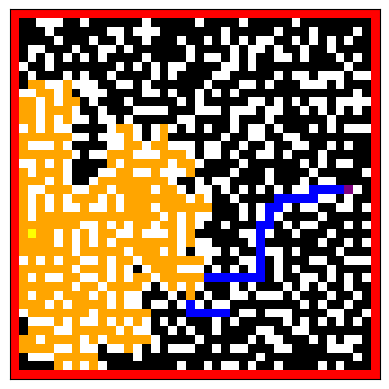

In [20]:
visualizeGrid(color_map_7, bot3Grid)

In [21]:
reset_grid(bot3Grid)

## Bot 4 Logic
The expression that represents the probability of a given cell being set on fire is:
$$
1-(1-q)^K
$$
where
$q = \text{ship flammability,}$
$K = \text{number of on-fire neighbors.}$

Our approach for Bot 4 will be an implementation of Dijkstra's Shortest-Path Algorithm in which our cost function will take in a given cell's probability of being set on fire several steps in advance. There are a few ways to perform this:
1. Markov Chain Monte Carlo Method: Before starting the algorithm, simulate the fire spreading throughout the grid $n$ times. Create a dataframe that records each open cell and which timestep $t_i$ for $i=1,...,n$ it was set on fire, with cells as rows and simulations as columns. We will be able to estimate the likelihood of a given cell being on fire by a given timestep by taking the rate of being on fire out of all simulations (shown below). This will give an estimate for the true distribution of probabilities for each cell. Then, when running Dijkstra's, when considering a cell for exploration, we take into account its calculated probability.
2. For each iteration of Dijkstra's, given a cell being considered, mathematically calculate its probability that it will be set on fire by a certain timestep. This is possible but would be more expensive than simulation.

We will choose option 1 with cost function $$C(node)=\alpha * p(\text{node on fire}|t)+\beta * d$$ 
where 
$$\alpha = \text{scaling factor for } p,$$
$$p(\text{node on fire}|t)=\frac{1}{n}\sum_{i=1}^{n} 1 (t_i\leq t),$$
$$\beta = \text{scaling factor for } d$$
$$d=\text{Manhattan distance from node to button.}$$

Note that using the Manhattan distance is a relaxation of the problem, as it assumes that every cell between the bot and the button is open.

Also note that the coefficients $\alpha$ and $\beta$ allow us to quantify how risk-averse we want to be. Early on, the algorithm will prioritize low-risk cells; later on, the algorithm will prioritize closer cells to the button. After trial and error, we choose $\alpha = 5$ and $\beta = 0.5$.

## Bot 4 Data Collection

In [22]:
def simulateFire(grid, fireLoc, df, numSims, q):
    r,c = fireLoc[0], fireLoc[1]
    for i in range(numSims):
        grid[r][c] = 3
        fireLocs = []
        fireLocs.extend(((r-1, c), (r+1, c), (r,c-1), (r,c+1)))
        t = 0
        while len(fireLocs) > 0:
            fireLocs = spreadFire(grid, fireLocs, q, df, i, t)
            t = t + 1
        reset_grid(grid)
    return df

In [23]:
def p(pt, df, t):
    return ((df.loc[pt] <= t).sum() / len(df.columns))

In [24]:
def d_manhattan(pt, butLoc):
    return abs(butLoc[0]-pt[0]) + abs(butLoc[1]-pt[1])

In [67]:
def C(pt, df, t, butLoc):
    return 4 * p(pt, df, t) + 0.475*d_manhattan(pt, butLoc)

In [26]:
import itertools
import pandas as pd

bot4Grid = copy.deepcopy(grid)
def simulateBot4(grid, fireLoc, q):
    numSims = 15
    cells = list(itertools.product(range(1, 41), repeat=2))
    df = pd.DataFrame(0, index=pd.MultiIndex.from_tuples(cells, names=["Row", "Col"]),
                      columns=[f'Sim_{i+1}' for i in range(numSims)])
    df = simulateFire(grid, fireLoc, df, numSims, q)
    return df

df = simulateBot4(bot4Grid, fireLoc, 0.5)
print(df.head())

         Sim_1  Sim_2  Sim_3  Sim_4  Sim_5  Sim_6  Sim_7  Sim_8  Sim_9  \
Row Col                                                                  
1   1       82     80     91     80     93    111     95     96     99   
    2       86     89     95     82     99    119    100     99    104   
    3        0      0      0      0      0      0      0      0      0   
    4        0      0      0      0      0      0      0      0      0   
    5        0      0      0      0      0      0      0      0      0   

         Sim_10  Sim_11  Sim_12  Sim_13  Sim_14  Sim_15  
Row Col                                                  
1   1       105      85      93      81      87      90  
    2       106      88      99      83      95      91  
    3         0       0       0       0       0       0  
    4         0       0       0       0       0       0  
    5         0       0       0       0       0       0  


In [27]:
# Test it out
sampleLocation = (15,25)
print(f"Estimated cost of going to {sampleLocation} by 150 timesteps: {C(sampleLocation, df, 150, butLoc)}")

Estimated cost of going to (15, 25) by 150 timesteps: 41.0


## Shortest Path (Bot 4)

In [28]:
from queue import PriorityQueue as pq

def shortestBot4(grid, botLoc, butLoc, df):
    fringe4 = pq()
    fringe4.put((0.0, botLoc))

    dist = {}
    dist[botLoc] = 0

    prev4 = {}
    prev4[botLoc] = None
    
    time = {}
    time[botLoc] = 0

#     t = 1

    while fringe4.qsize() > 0:
        curr = fringe4.get()
        curr1 = curr[1]
        priority = curr[0]
        if curr1 == butLoc:
#             print("Success")
            break
        t = time[curr1]
        r1, c1 = curr1[0], curr1[1]
        neighbors1 = [(r1-1, c1),(r1+1, c1),(r1, c1-1),(r1, c1+1)]
        for elt in neighbors1:
            if (elt[0] < 1 or elt[0] > 40) or (elt[1] < 1 or elt[1] > 40):
                continue
            elt_cost = C(elt, df, t+1, butLoc)
            if (bot4Grid[elt[0]][elt[1]] == 1 and (elt == butLoc or elt not in dist or elt_cost < dist[elt])):
                fringe4.put((elt_cost, elt))
                dist[elt] = elt_cost
                prev4[elt] = curr1
                time[elt] = t + 1

#         t = t + 1

    path4 = []
    curr = butLoc
    while curr is not None:
        path4.append(curr)
        curr = prev4[curr]

    # Return the path from start to finish
    return path4[::-1]

## Game Loop (Bot 4)

In [29]:
def gameLoop4(grid, botLoc, fireLoc, butLoc, trackTime, q):
    df = simulateBot4(grid, fireLoc, q=q)
    t = 1
    fireLocs = []
    r,c = fireLoc[0], fireLoc[1]
    fireLocs.extend(((r-1, c), (r+1, c), (r,c-1), (r,c+1)))
    success = True
    path4 = []
    path4 = shortestBot4(bot4Grid, botLoc, butLoc, df)
    grid[r][c] = 3
    for i in path4[1:]:
        if i == path4[-1]:
            break
        fireLocs = spreadFire(bot4Grid, fireLocs, q=q)
        if bot4Grid[i[0]][i[1]] == 3:
            if trackTime: 
                print(f"Bot4 failed in {t} timesteps.")
            success= False
            break
        t = t + 1
        bot4Grid[i[0]][i[1]] = 4
    # l = len(path4)
    bot4Grid[butLoc[0]][butLoc[1]] = 5
    bot4Grid[fireLoc[0]][fireLoc[1]] = 6
    return success


success_4 = gameLoop4(bot4Grid, botLoc, fireLoc, butLoc, True, 0.5)
if success_4: print("Success!")

Success!


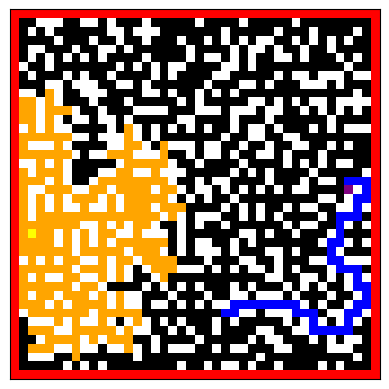

In [30]:
visualizeGrid(color_map_7, bot4Grid)

In [31]:
reset_grid(bot4Grid)

## Data Analysis

In [32]:
def does_path_exist(grid, fireLoc, butLoc, q):
    r,c = fireLoc[0], fireLoc[1]
    grid[fireLoc[0]][fireLoc[1]] = 3
    fireLocs = []
    fireLocs.extend(((r-1, c), (r+1, c), (r,c-1), (r,c+1)))
    while grid[butLoc[0]][butLoc[1]] != 3:
        fireLocs = spreadFire(grid, fireLocs, q)
    
    fringe = []
    fringe.append(botLoc)
    closed_set = {}
    
    while len(fringe) > 0:
        curr1 = fringe.pop(0)
        if curr1 == butLoc:
            reset_grid(grid)
            return True
            
        if curr1 not in closed_set:
            closed_set.update({curr1: 1})
            r1, c1 = curr1[0], curr1[1]
            neighbors1 = [(r1-1, c1),(r1+1, c1),(r1, c1-1),(r1, c1+1)]
            for elt in neighbors1:
                if bot1Grid[elt[0]][elt[1]] == 1 and elt not in closed_set:
                    fringe.append(elt)
                    
    reset_grid(grid)
    return False
# botLoc,butLoc,fireLoc = location_initialization(grid)
# print(does_path_exist(grid, fireLoc, butLoc, 0.5))

In [68]:
# q_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
q_list = [0.1, 0.3, 0.5, 0.7, 0.9]
success_df_1 = pd.DataFrame(0, index=q_list, columns=['Bot1', 'Bot2', 'Bot3', 'Bot4'])
success_df_2 = pd.DataFrame(0, index=q_list, columns=['Bot1', 'Bot2', 'Bot3', 'Bot4'])
numRounds = 20
# numGridsForTesting = 5
# grids_for_testing = []
#we would envelppe this in a for g in grids_for_testing and save the data both for the aggregate bot statistics and for per board basis if we think there might be anything cool, might take too long though
for q in q_list:
    success_rates_1 = [0.0,0.0,0.0,0.0]
    success_rates_2 = [0.0,0.0,0.0,0.0]
    counts_1 = [0,0,0,0]
    counts_2 = [0,0,0,0]
    num_1 = 0
    for i in range(numRounds):
#         print(f"Run {i + 1} out of {numRounds} for q: {q}")
        
        grid_to_test = createBoard(d)
        botLoc,butLoc,fireLoc = location_initialization(grid_to_test)
        path_exists = does_path_exist(grid_to_test, fireLoc, butLoc, q)
        while not path_exists:
            botLoc,butLoc,fireLoc = location_initialization(grid_to_test)
            path_exists = does_path_exist(grid_to_test, fireLoc, butLoc, q)
#         visualizeGrid(color_map_3, grid_to_test)
#         print(f"Bot location: {botLoc}\nFire starts at: {fireLoc}\nButton location: {butLoc}")
        
        closer_to_fire = d_manhattan(botLoc, butLoc) >= d_manhattan(fireLoc, butLoc)
        if closer_to_fire:
            if num_1 < (numRounds // 2):
                num_1 += 1
            else:
                while closer_to_fire:
                    botLoc,butLoc,fireLoc = location_initialization(grid_to_test)
                    path_exists = does_path_exist(grid_to_test, fireLoc, butLoc, q)
                    while not path_exists:
                        botLoc,butLoc,fireLoc = location_initialization(grid_to_test)
                        path_exists = does_path_exist(grid_to_test, fireLoc, butLoc, q)
                    closer_to_fire = d_manhattan(botLoc, butLoc) >= d_manhattan(fireLoc, butLoc)
    
        bot1Grid = copy.deepcopy(grid_to_test)
        bot2Grid = copy.deepcopy(grid_to_test)
        bot3Grid = copy.deepcopy(grid_to_test)
        bot4Grid = copy.deepcopy(grid_to_test)
            
        if gameLoop1(bot1Grid, botLoc, fireLoc, butLoc, False, q):
            if closer_to_fire:
                counts_1[0] += 1 
            else: counts_2[0] += 1
        # reset_grid(bot1Grid)
#         print("Bot 1 done")
        if gameLoop2(bot2Grid, botLoc, fireLoc, butLoc, False, q):
            if closer_to_fire:
                counts_1[1] += 1 
            else: counts_2[1] += 1
        # reset_grid(bot2Grid)
#         print("Bot 2 done")
        if gameLoop3(bot3Grid, botLoc, fireLoc, butLoc, False, q):
            if closer_to_fire:
                counts_1[2] += 1 
            else: counts_2[2] += 1
        # reset_grid(bot3Grid)
#         print("Bot 3 done")
        if gameLoop4(bot4Grid, botLoc, fireLoc, butLoc, False, q):
            if closer_to_fire:
                counts_1[3] += 1 
            else: counts_2[3] += 1
        # reset_grid(bot4Grid)
#         print("Bot 4 done")
    for bot in range(len(counts_1)):
        success_rates_1[bot] = counts_1[bot]/num_1
        success_rates_2[bot] = counts_2[bot]/(numRounds - num_1)
    success_df_1.loc[q] = success_rates_1
    success_df_2.loc[q] = success_rates_2
    print(f"Success rates, button starts closer to fire: \n{success_df_1.loc[q]}")
    print(f"Success rates, button starts closer to bot: \n{success_df_2.loc[q]}")
    print()

Success rates, button starts closer to fire: 
Bot1    0.666667
Bot2    0.833333
Bot3    0.833333
Bot4    0.833333
Name: 0.1, dtype: float64
Success rates, button starts closer to bot: 
Bot1    1
Bot2    1
Bot3    1
Bot4    1
Name: 0.1, dtype: int64

Success rates, button starts closer to fire: 
Bot1    0.4
Bot2    0.5
Bot3    0.5
Bot4    0.5
Name: 0.3, dtype: float64
Success rates, button starts closer to bot: 
Bot1    1
Bot2    1
Bot3    1
Bot4    1
Name: 0.3, dtype: int64

Success rates, button starts closer to fire: 
Bot1    0.750
Bot2    0.875
Bot3    0.750
Bot4    1.000
Name: 0.5, dtype: float64
Success rates, button starts closer to bot: 
Bot1    1
Bot2    1
Bot3    1
Bot4    1
Name: 0.5, dtype: int64

Success rates, button starts closer to fire: 
Bot1    0.1
Bot2    0.1
Bot3    0.1
Bot4    0.1
Name: 0.7, dtype: float64
Success rates, button starts closer to bot: 
Bot1    1
Bot2    1
Bot3    1
Bot4    1
Name: 0.7, dtype: int64

Success rates, button starts closer to fire: 
Bot1  

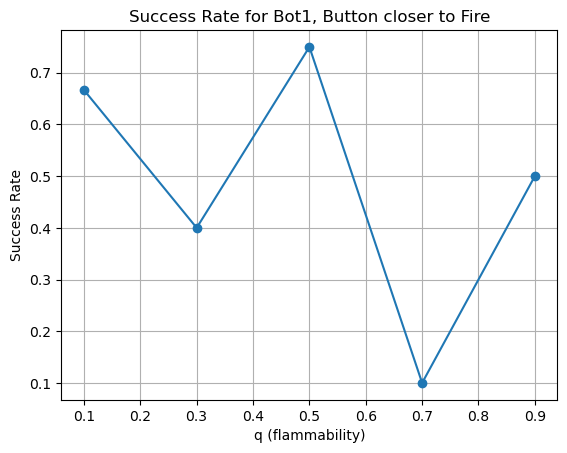

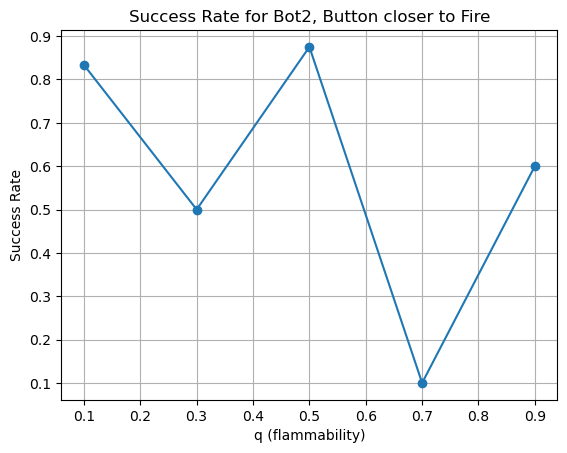

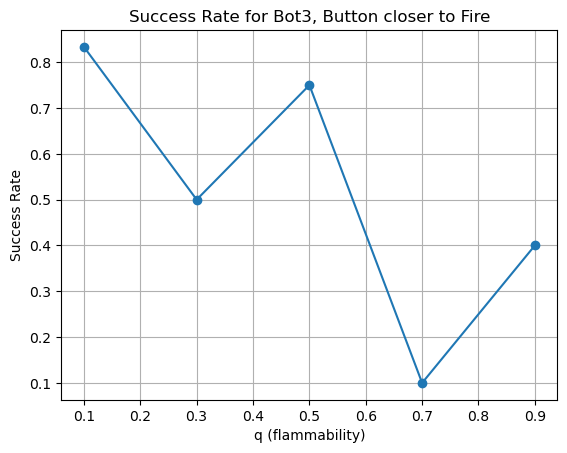

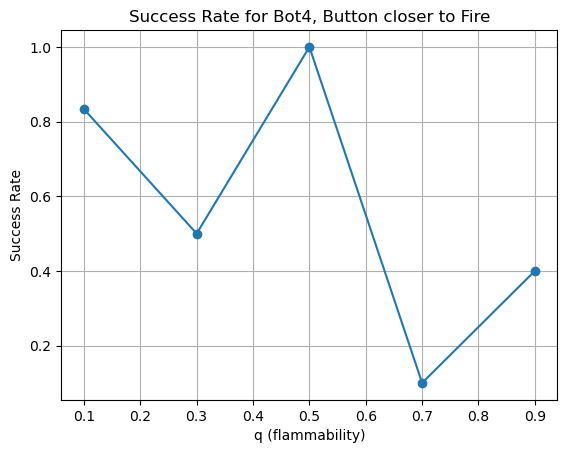

In [69]:
# Plotting for each bot, Button closer to Fire
for bot in ['Bot1', 'Bot2', 'Bot3', 'Bot4']:
    plt.figure()  # Create a new figure for each bot
    plt.plot(q_list, success_df_1[bot], marker='o')
    
    # Add labels and title
    plt.title(f'Success Rate for {bot}, Button closer to Fire')
    plt.xlabel('q (flammability)')
    plt.ylabel('Success Rate')
    
    # Show the grid for clarity
    plt.grid(True)
    
    # Show the plot
    plt.show()


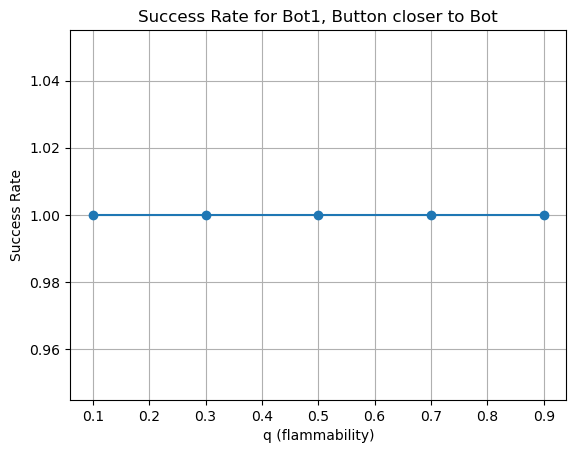

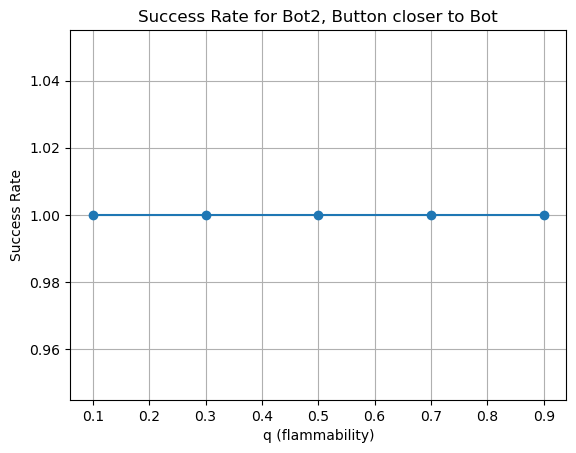

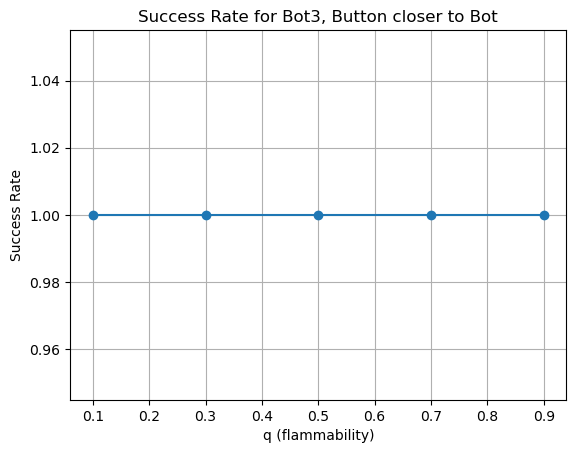

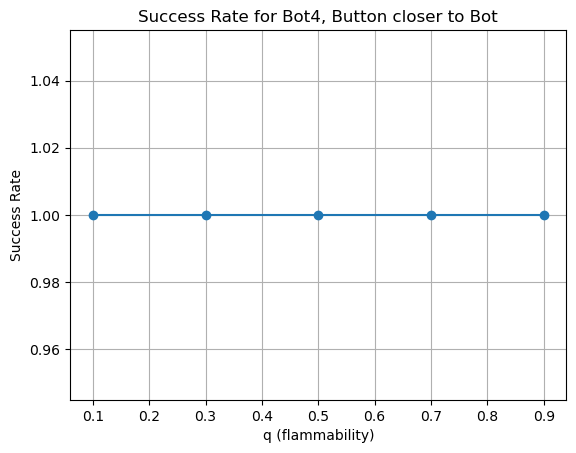

In [70]:
# Plotting for each bot, button closer to bot
for bot in ['Bot1', 'Bot2', 'Bot3', 'Bot4']:
    plt.figure()  # Create a new figure for each bot
    plt.plot(q_list, success_df_2[bot], marker='o')
    
    # Add labels and title
    plt.title(f'Success Rate for {bot}, Button closer to Bot')
    plt.xlabel('q (flammability)')
    plt.ylabel('Success Rate')
    
    # Show the grid for clarity
    plt.grid(True)
    
    # Show the plot
    plt.show()